# Projet 7: Linear Regression

## Albert Kabore


## Part 1 - Chart a Straight Line


In [39]:
#Import Dependencies 
#Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Define a variable c


Let c be degrees in Celcisus and it is a function of an input variable f, which stands for degrees in Fahrenheit.



In [40]:
%matplotlib inline
c = lambda f: 5 / 9 * (f - 32)

## Plot the function converting degrees Fahrenheit to degrees Celcisus


In [41]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [42]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

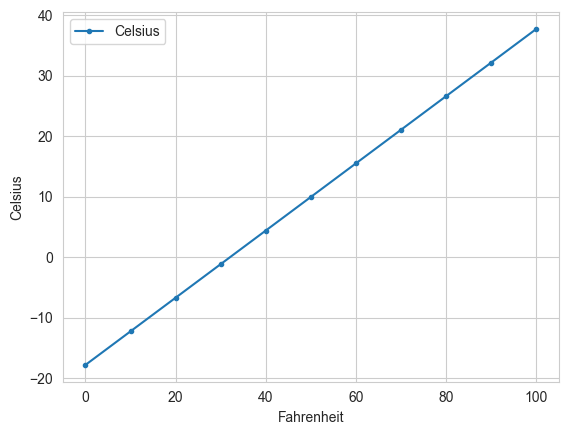

In [43]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part 2: Predict Average High Temperatures in New York City in January


## Section 1 - Data Acquisition


In [44]:
nyc = pd.read_csv('avg_hi_ny.csv')


## Section 2 - Data Inspection


In [45]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [46]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## Section 3 - Data Cleaning


In [47]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [48]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [49]:
nyc.Date.dtype

dtype('int64')

In [50]:
nyc.Date = nyc.Date.floordiv(100)

In [51]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Section 4 - Descriptive Statistics


In [52]:
pd.set_option('display.precision', 2)


In [53]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Section 5 - Build the Model


### Forecasting Future January Average High Temperatures

## The slope of the linear regression formula predicting temperature in degrees Fahrenheit in New York City

In [54]:
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

In [55]:
linear_regression.slope

0.014771361132966163

## The  y - coordinate of the y - intercept of the linear regression formula predicting temperature in degrees Fahrenheit in New York City


In [56]:
linear_regression.intercept

8.694993233674289

In [57]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [58]:
linear_regression.slope * 1850 + linear_regression.intercept

36.022011329661694

## Section 6 - Predict


In [59]:
temp_2024 = linear_regression.slope*2024+linear_regression.intercept
print(f'The temperature in New York City in January 2024 is predicted to be {temp_2024}.')


The temperature in New York City in January 2024 is predicted to be 38.5922281667978.


## Section 7 - Visualizations


### Plotting the Average High Temperatures and a Regression Line 

In [60]:
sns.set_style('whitegrid')

(10.0, 70.0)

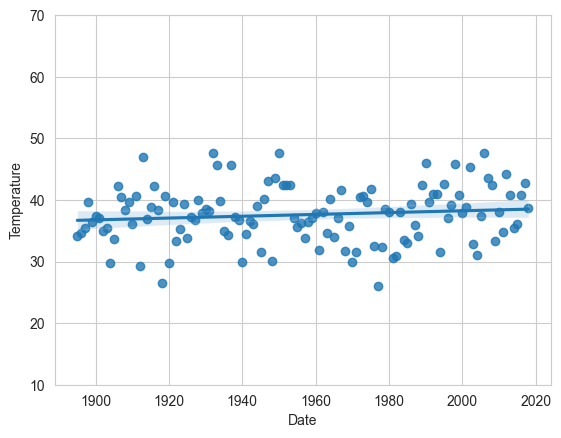

In [61]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

## Part 3: Predict Average High Temperatures in New York City in January


### Section 1 - Build the Model


In [62]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values,random_state = 11)


In [63]:
X_train.shape


(93, 1)

In [64]:
X_test.shape


(31, 1)

In [65]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)


LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


The following is the slope of the linear regression model:


In [66]:
m = linear_regression.coef_


In [67]:
print(m)

[0.01939167]


The following is the y-coordinate of the y-intercept of the linear regression model:


In [68]:
b = linear_regression.intercept_


In [69]:
print(b)

-0.30779820252656975


In [70]:
print(f'The linear regression equation is y = {m}x + {b}.') 


The linear regression equation is y = [0.01939167]x + -0.30779820252656975.


### Section 3 - Predict


In [71]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [72]:
#The expected temperature according to the model in the year 2024. 
predict = (lambda x: m * x + b)
predict(2024)


array([38.94094855])

### Section 4 - Visualizations


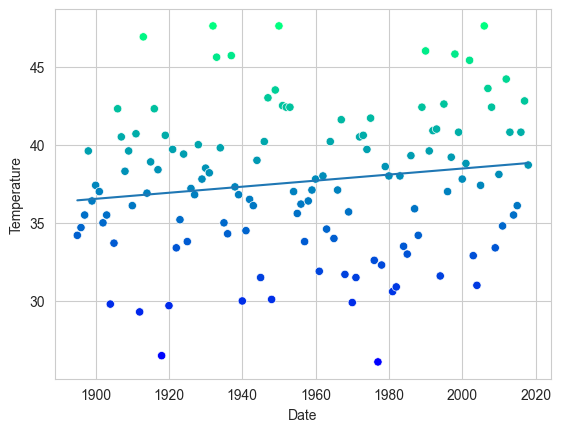

In [73]:
axes = sns.scatterplot(data=nyc, x ='Date', y='Temperature', hue='Temperature', palette = 'winter', legend =False)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x, y)


## Part 4: Insights
